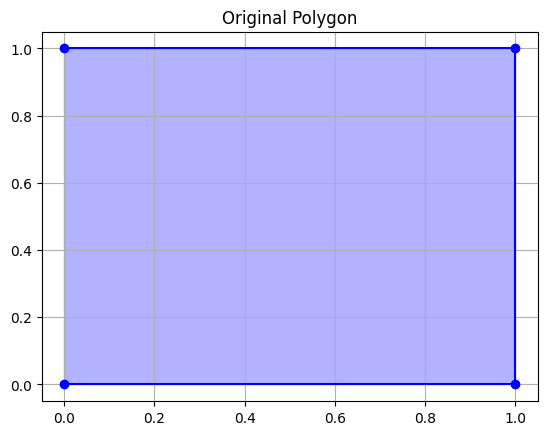

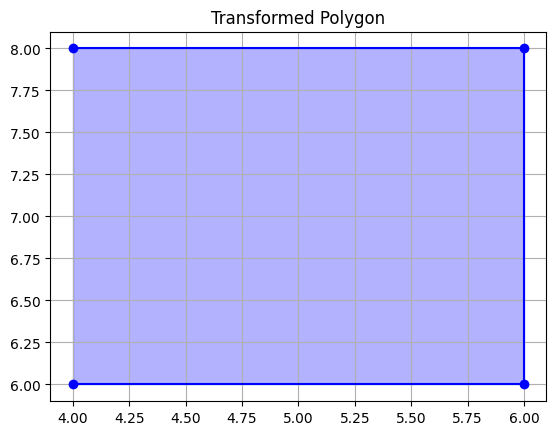

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

polygon = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

def plot_polygon(polygon, title, color='blue'):
    plt.figure()
    plt.plot(*polygon.T, marker='o', color=color)
    plt.fill(*polygon.T, alpha=0.3, color=color)
    plt.title(title)
    plt.grid()
    plt.show()

# 1. Translation
def translate(polygon, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    homogenous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    return (T @ homogenous_polygon.T).T[:, :2]

# 2. Scaling
def scale(polygon, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    homogenous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    return (S @ homogenous_polygon.T).T[:, :2]

# 3. Rotation
def rotate(polygon, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad), np.cos(rad), 0],
                  [0, 0, 1]])
    homogenous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    return (R @ homogenous_polygon.T).T[:, :2]

# 4. Reflection
def reflect(polygon, axis='x'):
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    homogenous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    return (R @ homogenous_polygon.T).T[:, :2]

# 5. Shearing
def shear(polygon, shx=0, shy=0):
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0, 0, 1]])
    homogenous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    return (Sh @ homogenous_polygon.T).T[:, :2]

polygon_transformed = translate(polygon, 2, 3)
polygon_transformed = scale(polygon_transformed, 2, 2)

plot_polygon(polygon, "Original Polygon")
plot_polygon(polygon_transformed, "Transformed Polygon")


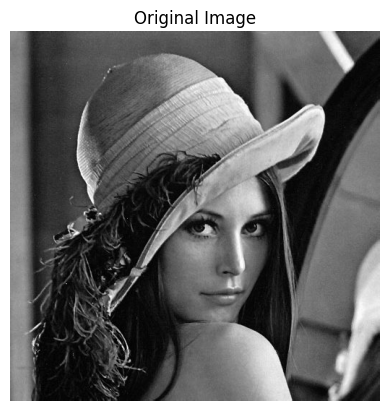

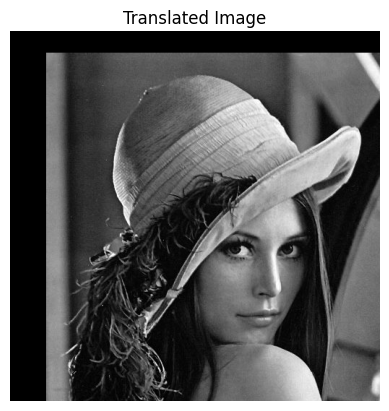

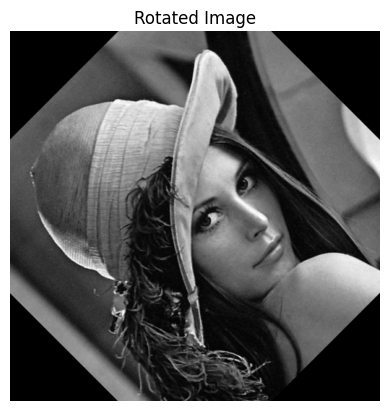

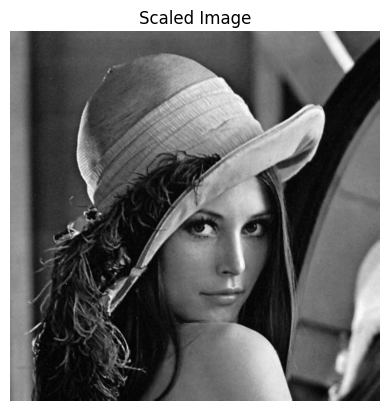

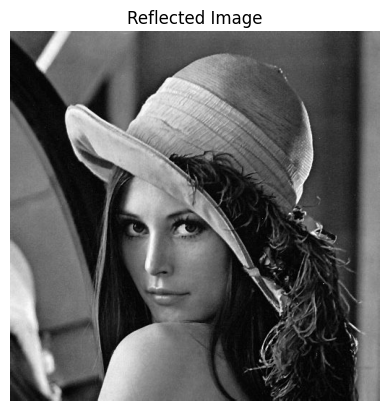

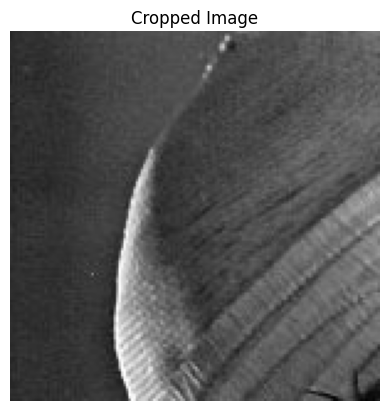

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#loading the image into the file
image = cv2.imread('/content/girlimg.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols, _ = image.shape
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, T, (cols, rows))

# 2. Image Scaling
def scale_image(image, sx, sy):
    return cv2.resize(image, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

# 4. Image Reflection
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

# 5. Image Cropping
def crop_image(image, x1, y1, x2, y2):
    return image[y1:y2, x1:x2]

# 6. Shearing
def shear_image(image, shx=0, shy=0):
    rows, cols, _ = image.shape
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))

# transformations
translated = translate_image(image, 50, 30)
rotated = rotate_image(image, 45)
scaled = scale_image(image, 1.5, 1.5)
reflected = reflect_image(image, 'y')
cropped = crop_image(image, 50, 50, 200, 200)

#transformed images
plot_image(image, "Original Image")
plot_image(translated, "Translated Image")
plot_image(rotated, "Rotated Image")
plot_image(scaled, "Scaled Image")
plot_image(reflected, "Reflected Image")
plot_image(cropped, "Cropped Image")
